# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Data Preprocessing

**Import library**

In [99]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [100]:
playstore = pd.read_csv('data/googleplaystore.csv')

In [101]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [102]:
playstore.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10841, dtype: bool

In [103]:
playstore.duplicated().sum()

483

**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [104]:
playstore['App'].shape

(10841,)

In [105]:
playstore1 = playstore.drop_duplicates(subset=['App'], keep= 'first')playstore.drop_duplicates(subset=['App'], keep= 'first')

SyntaxError: invalid syntax (3595580537.py, line 1)

Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [ ]:
playstore1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
playstore1.drop([10472], inplace=True)

/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/1618173783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1.drop([10472], inplace=True)


**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [ ]:
playstore1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
playstore1[['Category','Type','Content Rating','Android Ver']]= playstore1[['Category','Type','Content Rating','Android Ver']].astype('category')

/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/1434646194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1[['Category','Type','Content Rating','Android Ver']]= playstore1[['Category','Type','Content Rating','Android Ver']].astype('category')


In [ ]:
#playstore1.Category = 

**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [ ]:
playstore1.Installs = playstore1['Installs'].apply(lambda x: x.replace(',',''))

/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/905229894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1.Installs = playstore1['Installs'].apply(lambda x: x.replace(',',''))


In [ ]:
playstore1.Installs = playstore1['Installs'].apply(lambda x: x.replace('+',''))


/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/816926065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1.Installs = playstore1['Installs'].apply(lambda x: x.replace('+',''))


Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [ ]:
playstore1['Size'].replace('Varies with device', np.nan, inplace = True )
playstore1.Size = playstore1['Size'].astype("str").apply(lambda x: x.replace('+',''))
playstore1.Size = (playstore1.Size.replace(r'[kM]+$', '', regex=True).replace(r'[,]', '', regex=True).astype(float)  * \
             playstore1.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore1['Size'].fillna(playstore1.groupby('Category')['Size'].transform('mean'),inplace = True)


/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/3296563769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1['Size'].replace('Varies with device', np.nan, inplace = True )
/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/3296563769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1.Size = playstore1['Size'].astype("str").apply(lambda x: x.replace('+',''))
/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/3296563769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [ ]:
playstore1[playstore1.Size == "1,000+"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
playstore1.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size               float64
Installs            object
Type              category
Price               object
Content Rating    category
Genres              object
Last Updated        object
Current Ver         object
Android Ver       category
dtype: object

**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [ ]:
playstore1.Price = playstore1['Price'].apply(lambda x: x.replace('$',''))

/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/2011886673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1.Price = playstore1['Price'].apply(lambda x: x.replace('$',''))


In [ ]:

playstore1['Price']= playstore1['Price'].astype("float")

/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/3087158644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1['Price']= playstore1['Price'].astype("float")


Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [ ]:
##code her
playstore1[['Installs','Reviews','Size']]= playstore1[['Installs','Reviews','Size']].astype('int64')



/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/510657520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore1[['Installs','Reviews','Size']]= playstore1[['Installs','Reviews','Size']].astype('int64')


In [ ]:
playstore1.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size                 int64
Installs             int64
Type              category
Price              float64
Content Rating    category
Genres              object
Last Updated        object
Current Ver         object
Android Ver       category
dtype: object

## Data Wrangling

In [ ]:
df2 = playstore1.copy()

**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [ ]:
top_category = pd.crosstab(index= df2['Category'], columns='Jumlah').sort_values(by='Jumlah', ascending= False)

In [ ]:
top_category.head()

col_0,Jumlah
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [ ]:
most_categories = top_category.iloc[0,0]
total = top_category.iloc[0,0]

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [ ]:
playstore1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13134701,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
playstore1.groupby(by='App',).agg('sum')[["Reviews"]].sort_values("Reviews", ascending=False).head(10)

/var/folders/vf/9x1cbbd523q4vlmdnc1j9v1m0000gn/T/ipykernel_1139/1211419192.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  playstore1.groupby(by='App',).agg('sum')[["Reviews"]].sort_values("Reviews", ascending=False).head(10)


,Reviews
App,
Facebook,78158306
WhatsApp Messenger,69119316
Instagram,66577313
Messenger – Text and Video Chat for Free,56642847
Clash of Clans,44891723
Clean Master- Space Cleaner & Antivirus,42916526
Subway Surfers,27722264
YouTube,25655305
"Security Master - Antivirus, VPN, AppLock, Booster",24900999


Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

In [ ]:

rev_table = playstore1[['Category','App','Reviews','Rating']].groupby(by=['Category','App']) \
.agg({'Reviews':'sum','Rating':'mean'}) \
.sort_values(by='Reviews', ascending=False) \
.head(10).reset_index()

rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2,SOCIAL,Instagram,66577313,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
4,GAME,Clash of Clans,44891723,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,GAME,Subway Surfers,27722264,4.5
7,VIDEO_PLAYERS,YouTube,25655305,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,GAME,Clash Royale,23133508,4.6


## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

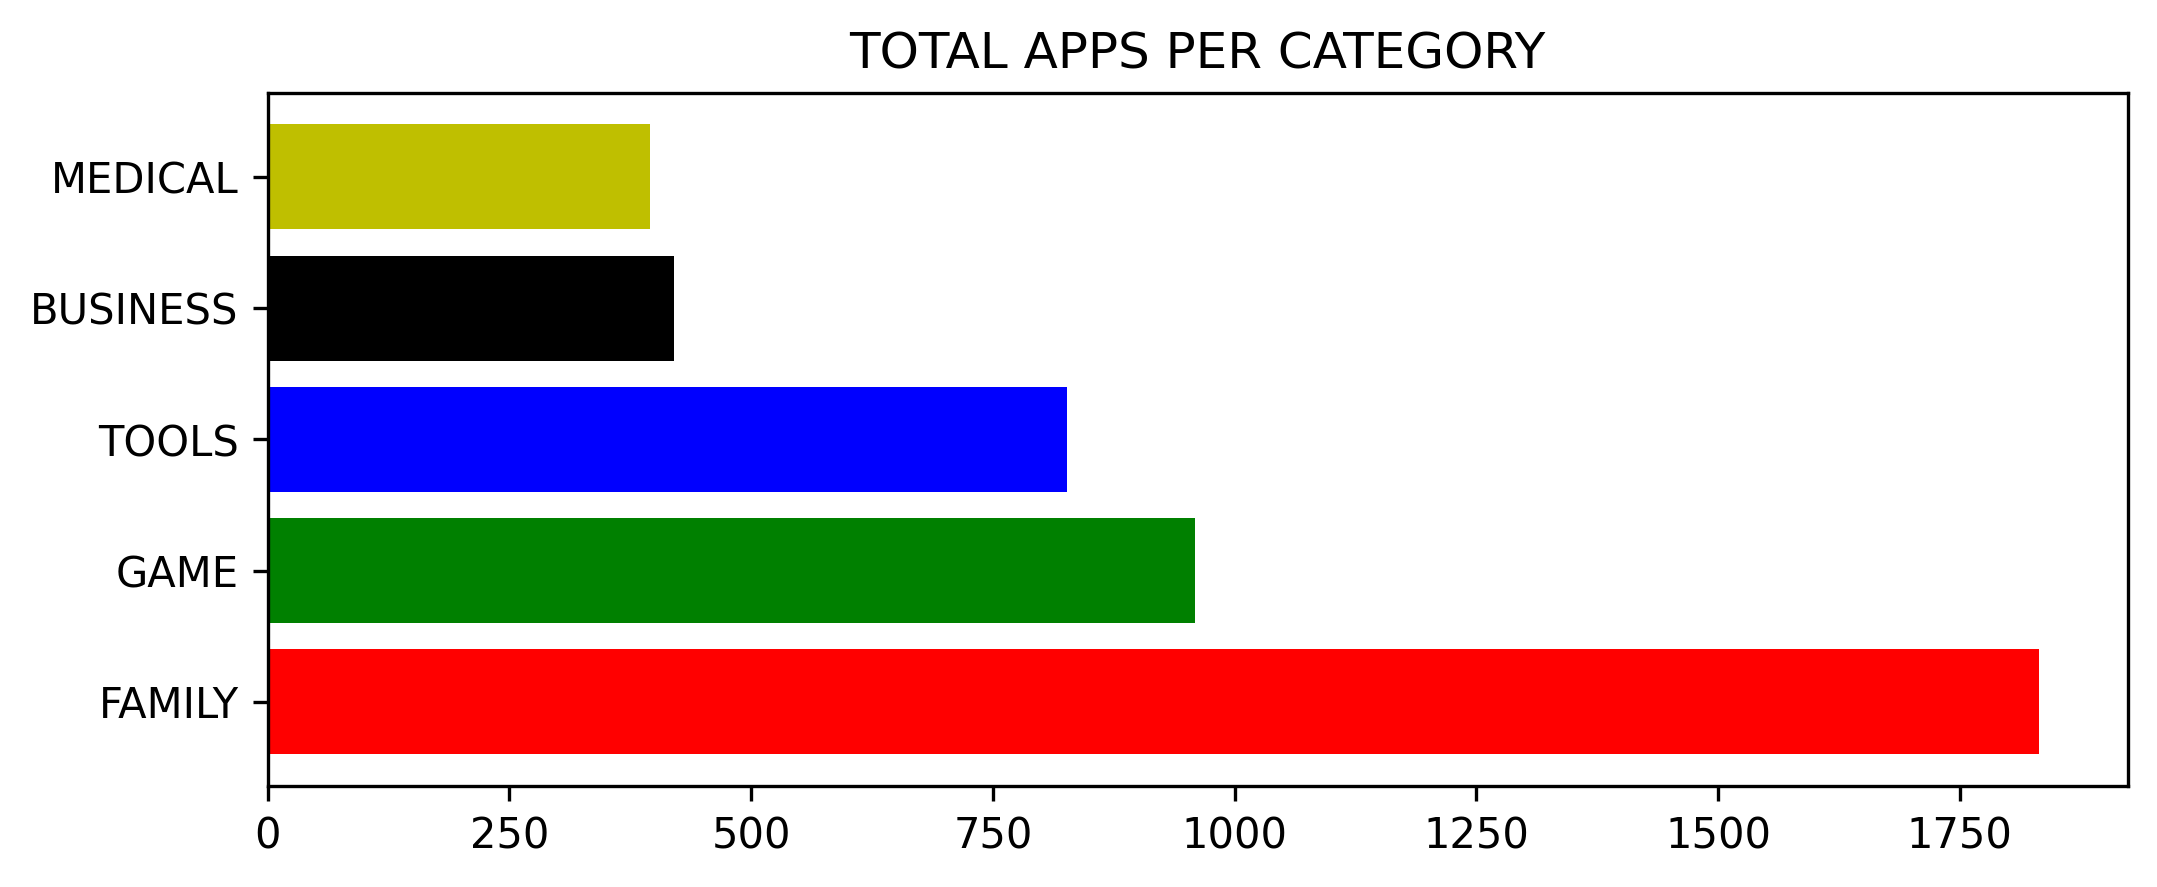

In [ ]:
cat_order = df2.groupby('Category',as_index=False).agg({
'App' : 'count'}).rename({'Category':'Total'}, axis=1).sort_values(by='App',ascending=False).head()
X = cat_order['Total'].values
Y = cat_order['App'].values 
my_colors = ["r","g","b","k","y","m","c"]
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
plt.barh(X,Y, color=my_colors)
plt.title('TOTAL APPS PER CATEGORY')
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

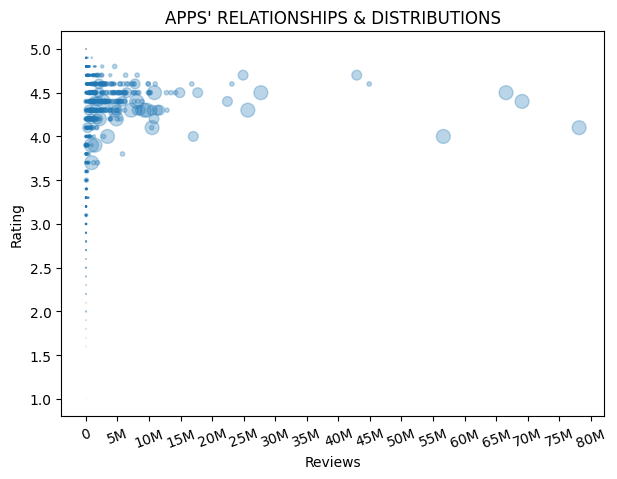

In [ ]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore1['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(7,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.title("APPS' RELATIONSHIPS & DISTRIBUTIONS")
plt.xlabel('Reviews')
plt.xticks([0,5000000,10000000,15000000,20000000,25000000,30000000,35000000,40000000,45000000,50000000,55000000,60000000,65000000,70000000,75000000,80000000],
           ['0','5M','10M','15M','20M','25M','30M','35M','40M','45M','50M','55M','60M','65M','70M','75M','80M'],rotation=20)
plt.yticks([1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.])
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")


**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

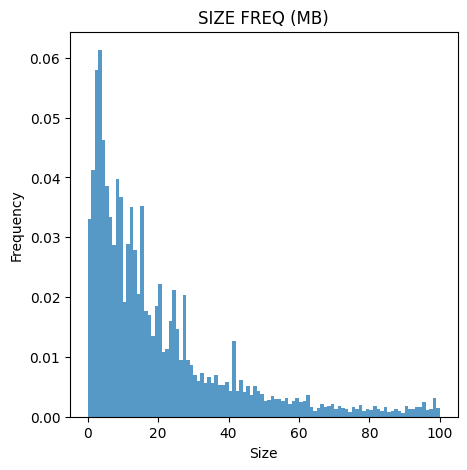

In [ ]:
X=(df2['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('SIZE FREQ (MB)')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [ ]:
## code here
df2.head()



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


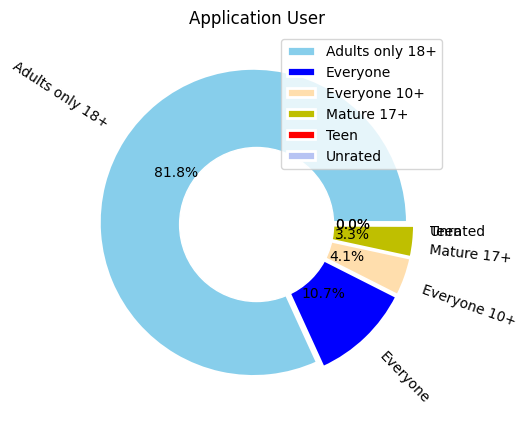

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Application User")
circle = plt.Circle((0, 0, 0, 0, 0, 0), 0.5, color='white')
g = plt.pie(df2['Content Rating'].value_counts(), 
wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
labels=['Adults only 18+','Everyone','Everyone 10+','Mature 17+','Teen','Unrated'],
colors=['skyblue','b','navajowhite','y','r','#B7C3F3'],autopct='%1.1f%%',
explode=(0.025,0.025,0.025,0.025,0.025,0.025), rotatelabels=True)
plt.legend()
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()
plt.savefig('application_user.png',bbox_inches="tight")